In [27]:
import wrangle
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import sklearn.preprocessing

In [28]:
train, validate, test = wrangle.wrangle_zillow()

In [29]:
len(train)+len(validate)+len(test)

48907

In [58]:
train.head()

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips
0,4.0,3.0,3105.0,7140.0,514262.0,1986.0,6059.0
1,3.0,1.0,1010.0,6245.0,144398.0,1950.0,6037.0
2,3.0,1.0,1154.0,7035.0,45731.0,1947.0,6037.0
3,3.0,2.0,1546.0,6630.0,154605.0,1973.0,6111.0
4,3.0,1.0,940.0,6080.0,436455.0,1957.0,6059.0


<AxesSubplot:xlabel='date_sold', ylabel='count'>

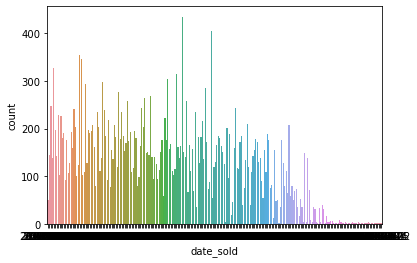

In [31]:
sns.countplot(x='date_sold', data=train)

<AxesSubplot:>

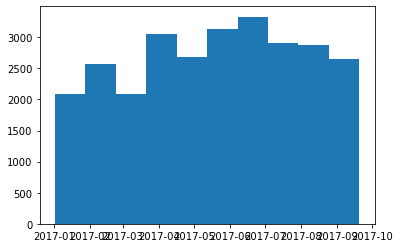

In [32]:
train['date_sold'].astype('datetime64').hist(grid=False, bins=10)


In [33]:
train.drop(columns='date_sold',inplace=True)
validate.drop(columns='date_sold',inplace=True), test.drop(columns='date_sold',inplace=True)

(None, None)

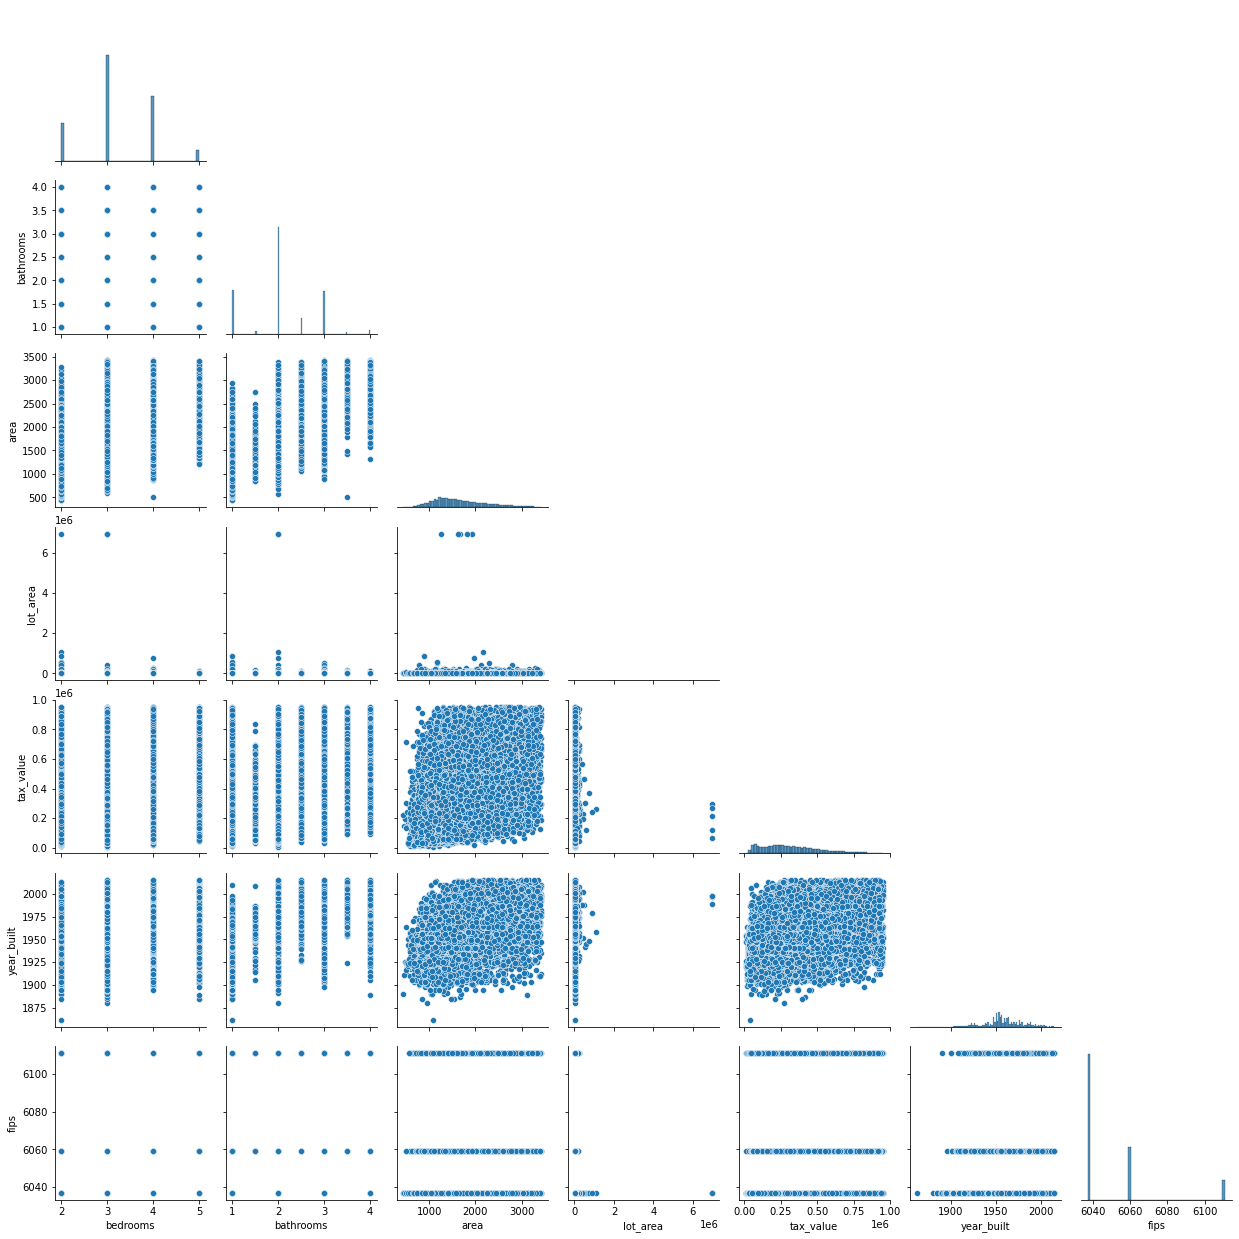

In [34]:
sns.pairplot(train, corner=True)
plt.show()

In [35]:
corr_matrix=train.corr()
corr_matrix

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips
bedrooms,1.000000,0.583155,0.596657,-0.003565,0.211692,0.375119,0.165019
bathrooms,0.583155,1.000000,0.767197,0.008517,0.369360,0.532613,0.140148
area,0.596657,0.767197,1.000000,0.019323,0.444869,0.471540,0.152687
lot_area,-0.003565,0.008517,0.019323,1.000000,-0.002314,0.033038,-0.007325
tax_value,0.211692,0.369360,0.444869,-0.002314,1.000000,0.256108,0.113845
year_built,0.375119,0.532613,0.471540,0.033038,0.256108,1.000000,0.303145
fips,0.165019,0.140148,0.152687,-0.007325,0.113845,0.303145,1.000000


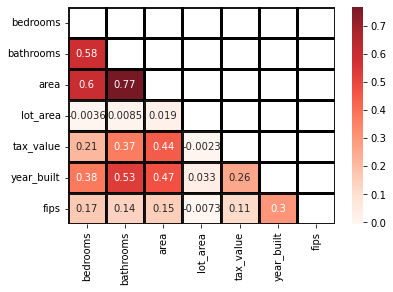

In [36]:
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

sns.heatmap(corr_matrix, cmap='Reds', annot=True,mask=np.triu(corr_matrix), **kwargs)
plt.show()

### H_null= there is no correlation between number of bedrooms and assessed value
### H_a= there is a relationship between number of bedrooms and assessed value

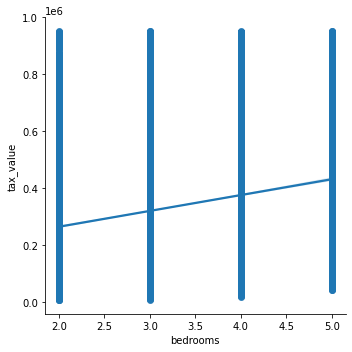

In [37]:
sns.lmplot(x='bedrooms', y='tax_value', data= train, scatter=True)

In [38]:
r, p_value = pearsonr(train.bedrooms, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2116919401026855
P-value: 5.183523254906572e-275


# we reject the null hypothesis and there is a weak positive correlation between number of bedrooms and assessed value

## H_null= there is no relationship between number of bathrooms and assessed value
## H_a= there is a relationship between number of bathrooms and assessed value

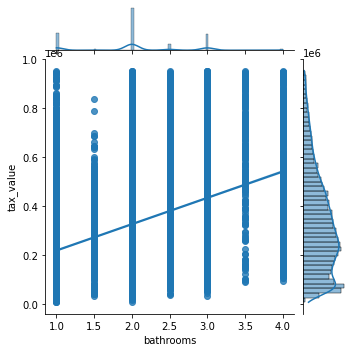

In [39]:
sns.jointplot(x="bathrooms", y="tax_value", data=train,  kind='reg', height=5)
plt.show()

In [40]:
r, p_value = pearsonr(train.bathrooms, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.36935991287106845
P-value: 0.0


# we reject the null hypothesis and there is a small positive correlation between number of bathrooms and assessed value

## H_null= there is no relationship between livable square feet and assessed value
## H_a= there is a relationship between livable square feet and assessed value

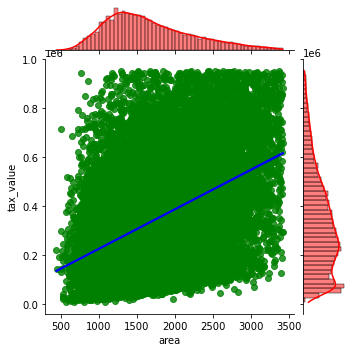

In [41]:
sns.jointplot(x="area", y="tax_value", data=train,  kind='reg', height=5, color='red',joint_kws={'color':'green'}, line_kws={"color": "blue"})
plt.show()

In [42]:
r, p_value = pearsonr(train.area, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.44486879390478085
P-value: 0.0


# we reject the null hypothesis and there is a small positive correlation between amount of livable square feet and assessed value

In [43]:
train.head()

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips
0,4.0,3.0,3105.0,7140.0,514262.0,1986.0,6059.0
1,3.0,1.0,1010.0,6245.0,144398.0,1950.0,6037.0
2,3.0,1.0,1154.0,7035.0,45731.0,1947.0,6037.0
3,3.0,2.0,1546.0,6630.0,154605.0,1973.0,6111.0
4,3.0,1.0,940.0,6080.0,436455.0,1957.0,6059.0


In [44]:
X_train = train.drop(columns=['tax_value','fips','lot_area'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value','fips','lot_area'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value','fips','lot_area'])
y_test = test.tax_value

Text(0.5, 1.0, 'Scaled')

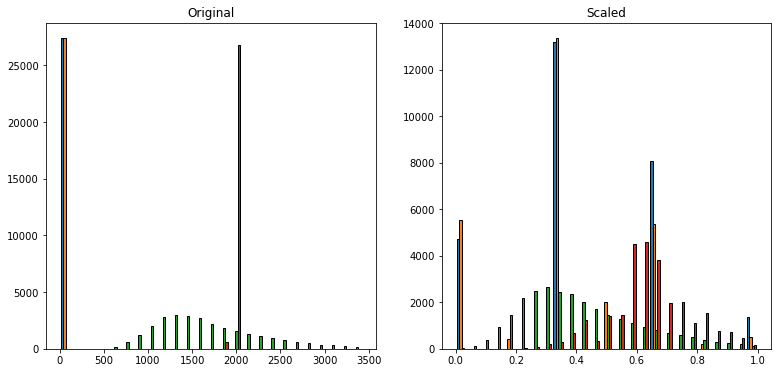

In [45]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [48]:
y_train.head()

0    514262.0
1    144398.0
2     45731.0
3    154605.0
4    436455.0
Name: tax_value, dtype: float64

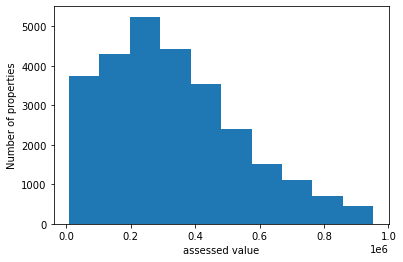

In [46]:
plt.hist(y_train)
plt.xlabel('assessed value')
plt.ylabel("Number of properties")
plt.show()

In [53]:

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict value_pred_mean
value_pred_mean = y_train['tax_value'].mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

# 2. compute G3_pred_median
value_pred_median = y_train['tax_value'].median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  206984.12 
Validate/Out-of-Sample:  210683.12
RMSE using Median
Train/In-Sample:  209863.51 
Validate/Out-of-Sample:  214214.18


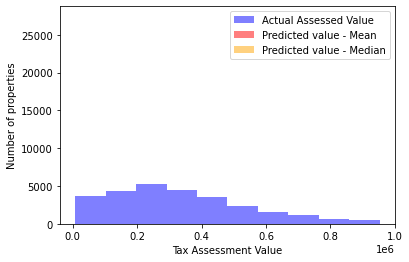

In [74]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Assessed Value")
plt.hist(y_train.value_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted value - Mean")
plt.hist(y_train.value_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted value - Median")
plt.xlabel("Tax Assessment Value")
plt.ylabel("Number of properties")
plt.legend()
plt.show()


In [57]:
import warnings
warnings.filterwarnings("ignore")

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm)**(1/2)

# predict validate
y_validate['value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  184159.39106422866 
Validation/Out-of-Sample:  187486.25126902145


## H_null= there is no relationship between livable square feet/ lot size ratio and assessed value
## H_a= there is a relationship between livable square feet/ lot size ratio and assessed value

In [83]:
train['lot_living_ratio']= train.area/ train.lot_area
validate['lot_living_ratio']= validate.area/ validate.lot_area
test['lot_living_ratio']= test.area/ test.lot_area

In [84]:
test.head()

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips,lot_living_ratio
0,3.0,3.0,2328.0,11414.0,503082.0,1956.0,6037.0,0.203960
1,5.0,3.0,2912.0,4992.0,830000.0,2005.0,6059.0,0.583333
2,4.0,2.5,2117.0,6018.0,446004.0,1950.0,6059.0,0.351778
3,3.0,3.0,2132.0,12904.0,411602.0,1961.0,6037.0,0.165220
4,4.0,2.0,2113.0,7560.0,774087.0,1957.0,6059.0,0.279497


In [69]:
r, p_value = pearsonr(train.lot_living_ratio, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2053421046420919
P-value: 1.5521245813586245e-258


## H_null= there is no relationship between non-bedroom or bathroom area and assessed value
## H_a= there is a relationship between non-bedroom or bathroom area and assessed value

In [85]:
train['non_bed_bath_area']=train.area-(train['bedrooms'] * 144)+ (train['bathrooms']*150)
validate['non_bed_bath_area']=validate.area-(validate['bedrooms'] * 144)+ (validate['bathrooms']*150)
test['non_bed_bath_area']=test.area-(test['bedrooms'] * 144)+ (test['bathrooms']*150)

In [86]:
test.head()

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips,lot_living_ratio,non_bed_bath_area
0,3.0,3.0,2328.0,11414.0,503082.0,1956.0,6037.0,0.203960,2346.0
1,5.0,3.0,2912.0,4992.0,830000.0,2005.0,6059.0,0.583333,2642.0
2,4.0,2.5,2117.0,6018.0,446004.0,1950.0,6059.0,0.351778,1916.0
3,3.0,3.0,2132.0,12904.0,411602.0,1961.0,6037.0,0.165220,2150.0
4,4.0,2.0,2113.0,7560.0,774087.0,1957.0,6059.0,0.279497,1837.0


In [70]:
r, p_value = pearsonr(train.non_bed_bath_area, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.4538605459106819
P-value: 0.0


In [96]:
X_train.head()

,bedrooms,bathrooms,area,lot_area,tax_value,year_built,fips,lot_living_ratio,non_bed_bath_area
0,4.0,3.0,3105.0,7140.0,514262.0,1986.0,6059.0,0.434874,2979.0
1,3.0,1.0,1010.0,6245.0,144398.0,1950.0,6037.0,0.161729,728.0
2,3.0,1.0,1154.0,7035.0,45731.0,1947.0,6037.0,0.164037,872.0
3,3.0,2.0,1546.0,6630.0,154605.0,1973.0,6111.0,0.233183,1414.0
4,3.0,1.0,940.0,6080.0,436455.0,1957.0,6059.0,0.154605,658.0


In [100]:
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [101]:
X_validate.head()

,bedrooms,bathrooms,area,lot_area,year_built,fips,lot_living_ratio,non_bed_bath_area
0,3.0,2.0,1233.0,7509.0,1948.0,6037.0,0.164203,1101.0
1,3.0,1.0,1000.0,5027.0,1970.0,6037.0,0.198926,718.0
2,3.0,3.0,2257.0,5500.0,1983.0,6059.0,0.410364,2275.0
3,3.0,2.0,1256.0,4976.0,1949.0,6037.0,0.252412,1124.0
4,4.0,2.0,1876.0,4832.0,1965.0,6037.0,0.388245,1600.0


Text(0.5, 1.0, 'Scaled')

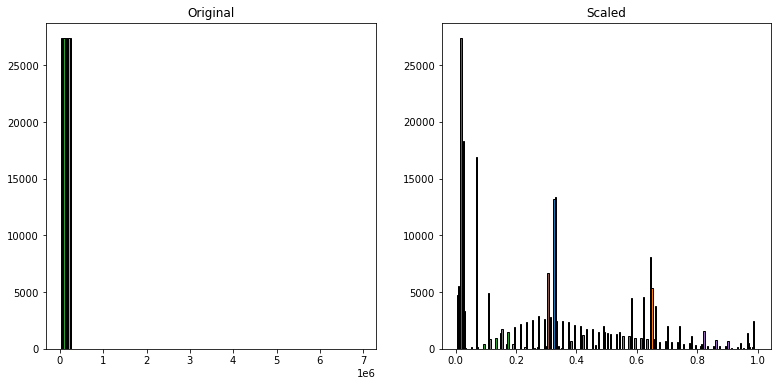

In [102]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [103]:
import warnings
warnings.filterwarnings("ignore")

# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm)**(1/2)

# predict validate
y_validate['value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  183755.57613736103 
Validation/Out-of-Sample:  187178.24342891522
